In [2]:
from selenium import webdriver
import os
import time

In [4]:
chromedriver = "chromedriver.exe"
os.environ["webddriver.chromedriver"] = chromedriver
driver = webdriver.Chrome(chromedriver)

In [5]:
pagina = '1'

In [6]:
driver.get("https://www.imdb.com/title/tt0944947/episodes?season=1&ref_=tt_eps_sn_"+pagina)

In [7]:
import sqlite3

In [8]:
conn = sqlite3.connect('imdb_got.sqlite3')

In [9]:
c = conn.cursor()

In [10]:
for i in range(1,8):
    #elink = driver.find_elements_by_class_name('zero-z-index')
    for e in range(0,20,2):
        elink = driver.find_elements_by_class_name('zero-z-index')
        elink[e].click()
        titulo = driver.find_element_by_tag_name('h1')
        rating = driver.find_element_by_class_name('ratingValue')
        diretor = driver.find_elements_by_css_selector('.credit_summary_item a')[0]
        print(titulo.text+' '+rating.text.replace('/10','')+' '+str(i)+' '+str(int(e/2+1))+' '+diretor.text)
        c.execute('insert into tb_got values (?,?,?,?,?,?)', (None,titulo.text,rating.text.replace('/10',''),diretor.text,i,int(e/2+1)))
        conn.commit()
        print('inserido')
        driver.back()
        time.sleep(8)
    nxt = driver.find_element_by_css_selector('a#load_next_episodes')
    nxt.click()
    time.sleep(8)   

Winter Is Coming  9,0 1 1 Timothy Van Patten
inserido
The Kingsroad  8,8 1 2 Timothy Van Patten
inserido
Lord Snow  8,7 1 3 Brian Kirk
inserido
Cripples, Bastards, and Broken Things  8,8 1 4 Brian Kirk
inserido
The Wolf and the Lion  9,1 1 5 Brian Kirk
inserido
A Golden Crown  9,2 1 6 Daniel Minahan
inserido
You Win or You Die  9,3 1 7 Daniel Minahan
inserido
The Pointy End  9,1 1 8 Daniel Minahan
inserido
Baelor  9,6 1 9 Alan Taylor
inserido
Fire and Blood  9,5 1 10 Alan Taylor
inserido
The North Remembers  8,9 2 1 Alan Taylor
inserido
The Night Lands  8,6 2 2 Alan Taylor
inserido
What Is Dead May Never Die  8,9 2 3 Alik Sakharov
inserido
Garden of Bones  8,9 2 4 David Petrarca
inserido
The Ghost of Harrenhal  8,9 2 5 David Petrarca
inserido
The Old Gods and the New  9,1 2 6 David Nutter
inserido
A Man Without Honor  9,0 2 7 David Nutter
inserido
The Prince of Winterfell  8,9 2 8 Alan Taylor
inserido
Blackwater  9,7 2 9 Neil Marshall
inserido
Valar Morghulis  9,4 2 10 Alan Taylor
inse

IndexError: list index out of range

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
sql = 'select * from tb_got'

In [44]:
df = pd.read_sql_query(sql,conn)

In [45]:
df

,id,titulo,nota,diretor,temporada,episodio
0,1,Winter Is Coming,9.0,Timothy Van Patten,1,1
1,2,The Kingsroad,8.8,Timothy Van Patten,1,2
2,3,Lord Snow,8.7,Brian Kirk,1,3
3,4,"Cripples, Bastards, and Broken Things",8.8,Brian Kirk,1,4
4,5,The Wolf and the Lion,9.1,Brian Kirk,1,5
5,6,A Golden Crown,9.2,Daniel Minahan,1,6
6,7,You Win or You Die,9.3,Daniel Minahan,1,7
7,8,The Pointy End,9.1,Daniel Minahan,1,8
8,9,Baelor,9.6,Alan Taylor,1,9
9,10,Fire and Blood,9.5,Alan Taylor,1,10


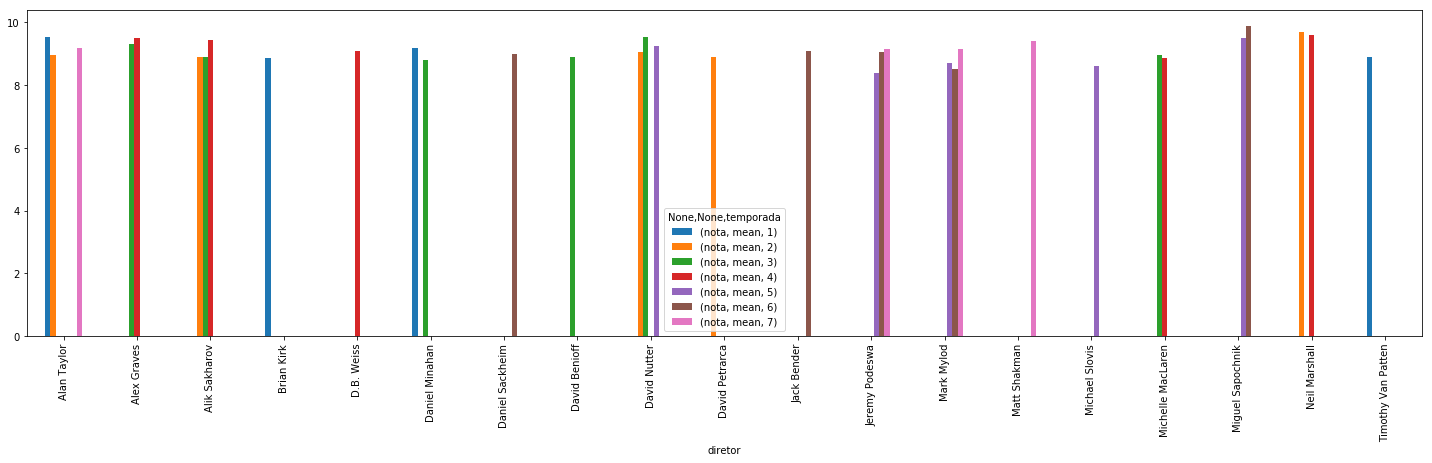

In [46]:
df.groupby(['temporada','diretor']).aggregate({'nota':[np.mean]}).unstack('temporada').plot(figsize=(25,6),kind='bar')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

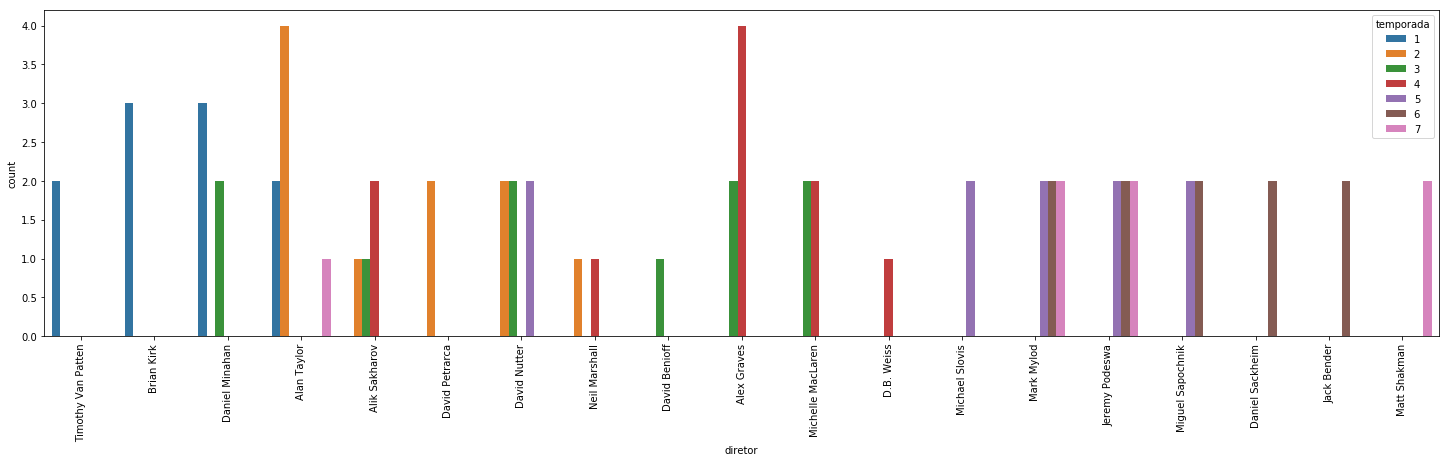

In [47]:
plt.subplots(figsize=(25,6))
sns.countplot(data=df,x='diretor', hue='temporada')
plt.xticks(rotation=90)

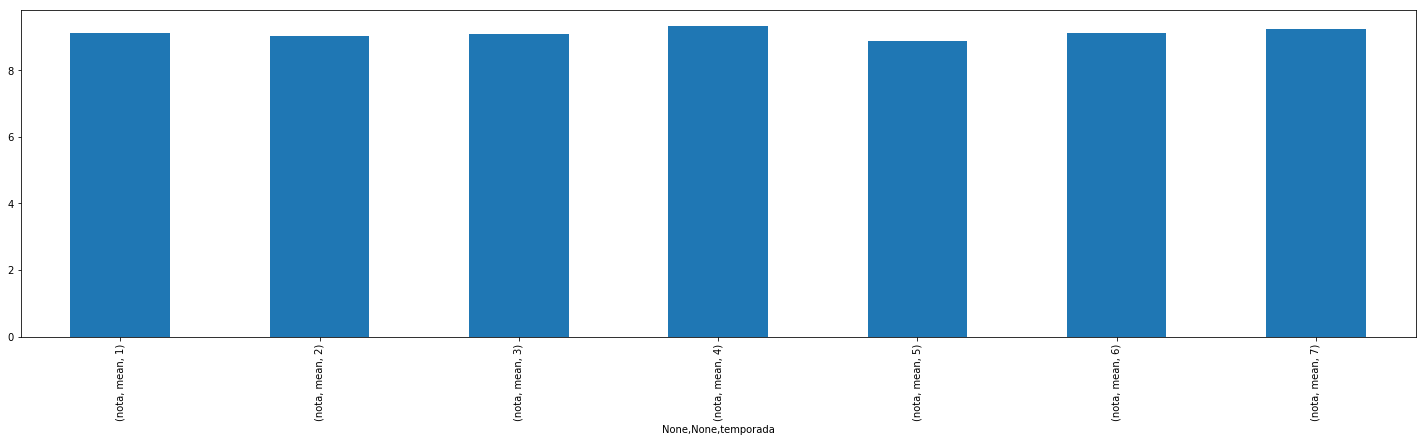

In [48]:
df.groupby(['temporada']).aggregate({'nota':[np.mean]}).unstack('temporada').plot(figsize=(25,6),kind='bar')

In [49]:
import dash_html_components as html
from dash.dependencies import Input, Output, State
import dash
import dash_core_components as dcc
import plotly.offline as pyo
import plotly.graph_objs as go

In [50]:
app = dash.Dash()

In [51]:
diretores = []

In [52]:
dftemp = pd.pivot_table(df, values='nota', index=['diretor'], columns=['temporada'], aggfunc=np.mean)

In [53]:
dftemp.fillna(0)

temporada,1,2,3,4,5,6,7
diretor,,,,,,,
Alan Taylor,9.550000,8.95,0.00,0.00,0.00,0.00,9.20
Alex Graves,0.000000,0.00,9.30,9.50,0.00,0.00,0.00
Alik Sakharov,0.000000,8.90,8.90,9.45,0.00,0.00,0.00
Brian Kirk,8.866667,0.00,0.00,0.00,0.00,0.00,0.00
D.B. Weiss,0.000000,0.00,0.00,9.10,0.00,0.00,0.00
Daniel Minahan,9.200000,0.00,8.80,0.00,0.00,0.00,0.00
Daniel Sackheim,0.000000,0.00,0.00,0.00,0.00,9.00,0.00
David Benioff,0.000000,0.00,8.90,0.00,0.00,0.00,0.00
David Nutter,0.000000,9.05,9.55,0.00,9.25,0.00,0.00


In [54]:
for diretoria in dftemp.index:
    #mydict= {}
    #mydict['label'] = str(dfpol1.loc[candidatos])
    #mydict['value'] = str(dfpol1.loc[candidatos])
    #candidato.append(mydict)
    diretores.append({'label':str(diretoria),'value':str(diretoria)})

In [55]:
app.layout = html.Div([
    dcc.Graph(id='graph_diretores'),
    dcc.Dropdown(id='dirpicker', options=diretores,value=['Alan Taylor'])
    #html.Button(id='submit-button',n_clicks=0,children='Pesquisar')
    
])
          

In [ ]:
@app.callback(Output('graph_diretores', 'figure'),
             [Input('dirpicker','value')])
             #[State('politicopicker','value')])
def update_figure(vdiretor):
    
    filtrado = dftemp[dftemp.index == vdiretor]
    barras = []
    #barrinhas = []
    data1 = go.Bar(x=filtrado.index,
               y=filtrado[1],
               name='1')
    data2 = go.Bar(x=filtrado.index,
               y=filtrado[2],
               name='2')
    data3 = go.Bar(x=filtrado.index,
               y=filtrado[3],
               name='3')
    data4 = go.Bar(x=filtrado.index,
               y=filtrado[4],
               name='4')
    data5 = go.Bar(x=filtrado.index,
               y=filtrado[5],
               name='5')
    data6 = go.Bar(x=filtrado.index,
               y=filtrado[6],
               name='6')
    data7 = go.Bar(x=filtrado.index,
               y=filtrado[7],
               name='7')
   
    barras = [data1,data2,data3,data4,data5,data6,data7]        
    #barras = barrinhas]
    return{
        'data':barras,
        'layout': go.Layout(title='titulo teste')
    }

In [ ]:
if __name__ == '__main__':
    app.run_server()

 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [26/Nov/2018 11:36:57] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [26/Nov/2018 11:36:58] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [26/Nov/2018 11:36:58] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [26/Nov/2018 11:36:58] "GET /favicon.ico HTTP/1.1" 200 -
[2018-11-26 11:36:58,267] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "c:\users\mahjjongh\venv\lib\site-packages\flask\app.py", line 1982, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\users\mahjjongh\venv\lib\site-packages\flask\app.py", line 1614, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\users\mahjjongh\venv\lib\site-packages\flask\app.py", line 1517, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "c:\users\mahjjongh\venv\lib\site-packages\flask\_compat.py", line 33, in reraise
    raise value
  File "c:\users\mahjjong